## Introduction: Analysis report for modeling the fragment-length distributions of public RNA-seq data 

In this notebook I walk through fitting statistical distributions to public RNA-sequencing data. 

The objective here is to model the fragmentation process that was used to generate the RNA-seq data. These 

The resulting models are used for simulating synthetic RNA-seq data. 


### Imports 

The following standard data science, machine-learning libraries in Python will be used: Pandas, sklearn, numpy and scipy. We will also use the matplotlib and seaborn libraries for visualization.


In [25]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import norm
import seaborn as sns 
import json   
%matplotlib inline


### Loading the data and examine

We start off by loading the aligned RNA-seq data (in SAM format) into the program by searching for a file with a '.sam' extension in the current working directory. Once the file is detected, we extract the 9th column from the file,  which is the template length representing the aligned fragment-length or insert. This data is then sequentially written to a python list for storage. 


<class 'numpy.ndarray'>


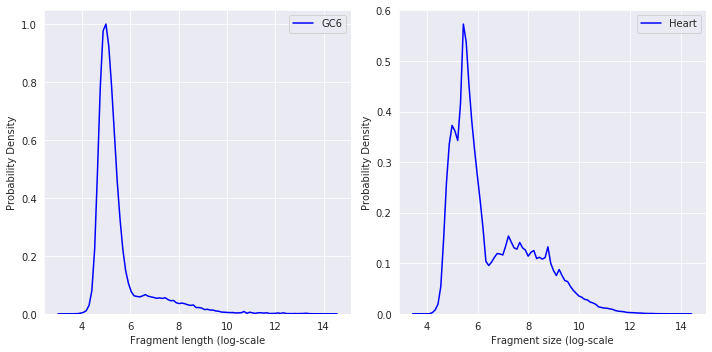

In [20]:
# samFile = ''
# for file in os.listdir('.'):
#     if file.endswith('.sam'):
#         samFile = os.path.join('.', file)

file1 = 'GC6_SUN_control_140624_2019.sam'
file2 = 'DCM2sorted.unique.sam'

with open(file1, 'r') as f1, open(file2, 'r') as f2:
    
    FL_1 = []
    FL_2 = []
    for line in f1:

        if line[0] != '@':
            parts = line.split('\t')
            # print(parts)
            TLEN = parts[8]
            FL_1.append(TLEN)

    FL = list(map(int, FL_1))
    FLS = FL.sort()
    NEG = []
    POS = []

    for i in FL:
        if i >= 0:
            POS.append(i)

    data1 = np.array(POS)
    datalog1 = np.log(data1)
    print(type(datalog1))
    for line in f2:

        if line[0] != '@':
            parts = line.split('\t')
            # print(parts)
            TLEN = parts[8]
            FL_2.append(TLEN)

    FL2 = list(map(int, FL_2))
    FLS = FL.sort()
    NEG = []
    POS = []
    
    for i in FL2:
        if i >= 0:
            POS.append(i)

    data2 = np.array(POS)
    datalog2 = np.log(data2)
    print('Number of fragments detected in' +  str(file1) + " = " len(datalog1))
    print('Number of fragments detected in' +  str(file2) + " = " len(datalog2))

    np.linspace(datalog1.min(), datalog2.max(), 200)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    sns.axes_style('darkgrid')
    y1 = datalog1
    y2 = datalog2
    x1 = sns.distplot(datalog1, color='b', kde=True, hist=True, bins=1000, ax=axes[0],label='GC6')

    x2 = sns.distplot(datalog2, color='b', kde=True, hist=True, bins=1000, ax=axes[1],label='Heart')

    x1.set_xlabel('Fragment length (log-scale)')
    x1.set_ylabel('Probability Density')
    x2.set_xlabel('Fragment size (log-scale')
    x2.set_ylabel('Probability Density')
    
    fig.tight_layout()
    plt.show()

### Fit the data to statistical distributions 




In [37]:
# Fit a Gaussian mixture model to data

data2log = datalog2.reshape(-1, 1)
N = np.arange(1, 4)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GMM(N[i]).fit(data2log)

g = GMM(n_components=3, covariance_type='full')
clf = g.fit(data2log)

means = clf.means_.flatten()
covariances = clf.covariances_.flatten()
weights = clf.weights_.flatten()

AIC = [round(m.aic(data2log), 2) for m in models]
BIC = [round(m.bic(data2log), 2) for m in models]
# print('aic = ' + str(AIC))
# print('bic = ' + str(BIC))

index= ['model_1', 'model_2', 'model_3']
df = pd.DataFrame({'Means': means, 'Covariances': covariances, 'Weights': weights, 'AIC':AIC, 'BIC':BIC}, index=index)
mat = np.random.rand(3, 3)
df.join(pd.DataFrame(mat))
df



,Means,Covariances,Weights,AIC,BIC
model_1,7.416060,0.544555,0.238955,67565347.00,67565376.42
model_2,5.441819,0.200179,0.586818,58136005.90,58136079.46
model_3,9.088143,1.056470,0.174228,58099069.67,58099187.36
